In [1]:
import cv2    
import math 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   
import numpy as np 
from keras.utils import np_utils
from skimage.transform import resize  
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("data/ASL_images/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("data/ASL_images/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [3]:
test = pd.read_csv("data/ASL_images/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


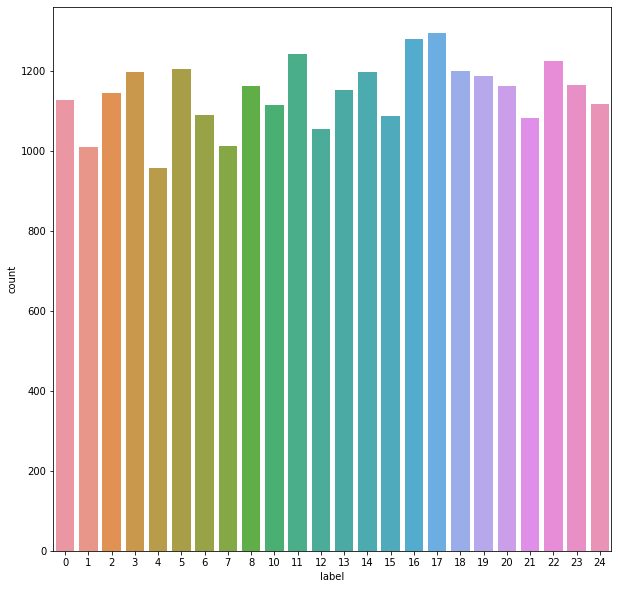

In [5]:
plt.figure(figsize = (10,10)) # Label Count
sns.countplot(train_df['label'])

In [6]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [7]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [8]:
x_train = train_df.values
x_test = test_df.values

In [9]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

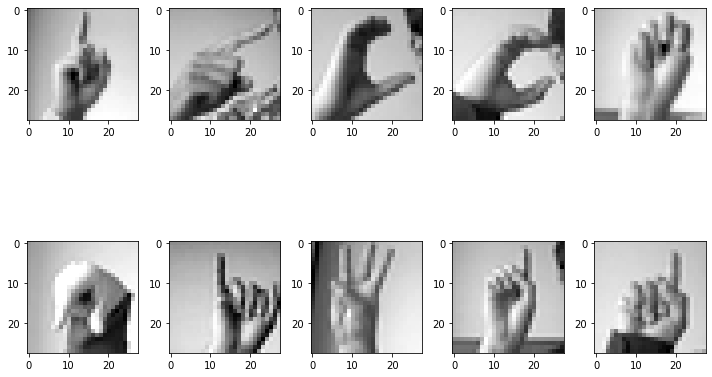

In [11]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

In [12]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [13]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D(2))
model.add(Conv2D(50 , (3,3), padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(25 , (3,3), padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense( 512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 25)          11275     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 25)          0        

In [14]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5",  monitor= 'val_loss', save_best_only=True)
callbacks_list = [checkpoint]
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





215/215 [==============================] - 53s 248ms/step - loss: 2.2882 - acc: 0.3043 - val_loss: 0.8450 - val_acc: 0.7001
Epoch 2/20
215/215 [==============================] - 49s 226ms/step - loss: 0.8123 - acc: 0.7277 - val_loss: 0.3374 - val_acc: 0.9050
Epoch 3/20
215/215 [==============================] - 50s 234ms/step - loss: 0.4553 - acc: 0.8448 - val_loss: 0.1907 - val_acc: 0.9318
Epoch 4/20
215/215 [==============================] - 50s 233ms/step - loss: 0.3038 - acc: 0.8967 - val_loss: 0.1297 - val_acc: 0.9642
Epoch 5/20
215/215 [==============================] - 49s 230ms/step - loss: 0.2172 - acc: 0.9276 - val_loss: 0.0939 - val_acc: 0.9716
Epoch 6/20
215/215 [==============================] - 52s 244ms/step - loss: 0.1570 - acc: 0.9489 - val_loss: 0.0636 - val_acc: 0.9823
Epoch 7/20
215/215 [==============================] - 50s 235ms/step - loss: 0.1164 - ac

In [15]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

7172/7172 [==============================] - 4s 557us/step
Accuracy of the model is -  99.37255995538204 %


In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

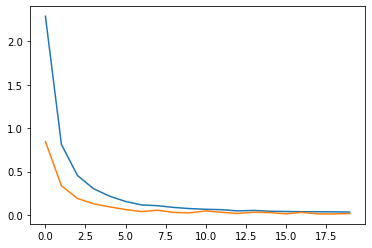

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

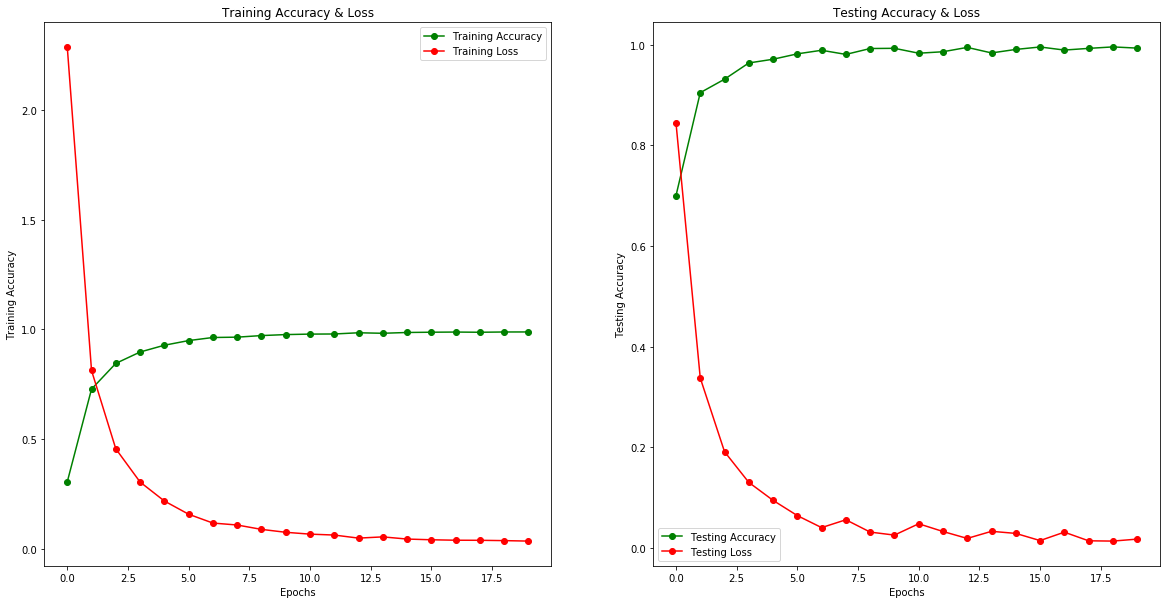

In [18]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , train_loss , 'ro-' , label = 'Training Loss')
ax[0].set_title('Training Accuracy & Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Training Accuracy")
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']
ax[1].plot(epochs , test_acc , 'g-o' , label = 'Testing Accuracy')
ax[1].plot(epochs , test_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Testing Accuracy")
plt.show()

In [19]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]     

array([ 6,  5, 10,  0,  3])

In [36]:
cm = confusion_matrix(y,predictions)


In [22]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

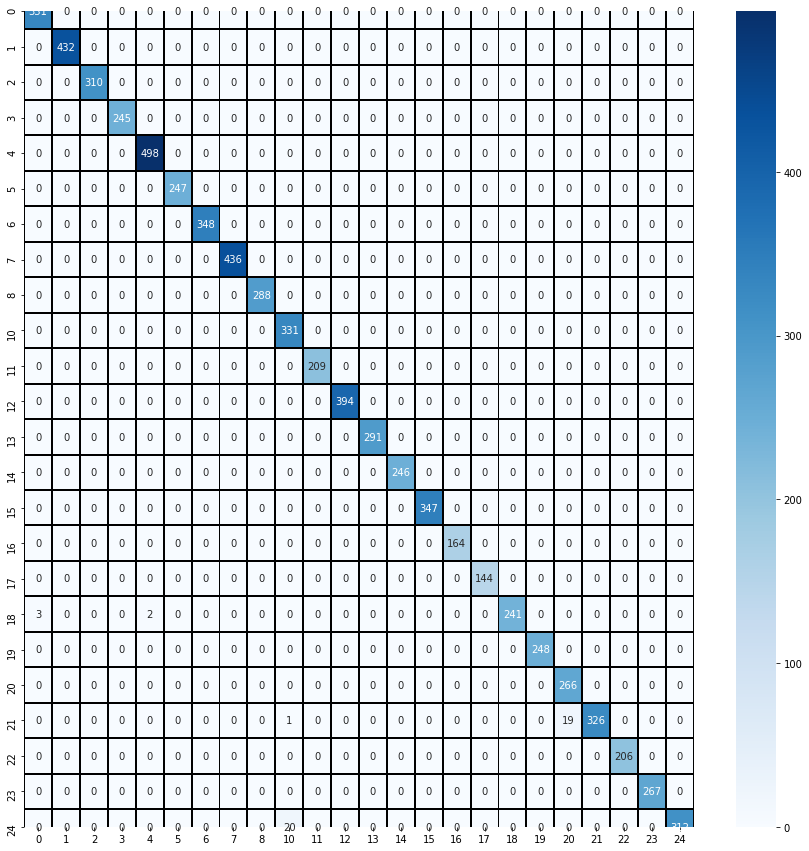

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [24]:
correct = np.nonzero(predictions == y)[0]
incorrect = np.nonzero(predictions != y)[0]

/home/esteban/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


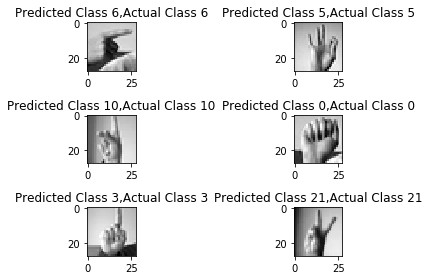

In [25]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1

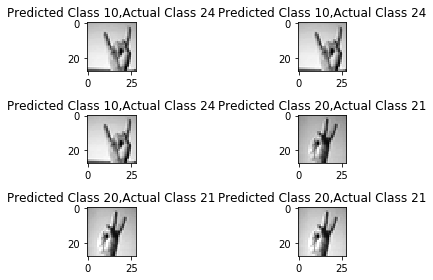

In [26]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1

In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

